# Machine learning - supervised, unsupervised
# Supervised : data + label, Unsupervised : data
# Supervised : Regression, Classification
# Unsupervised : Clustering

# # Classification with various methds
# Refer to http://machinelearningmastery.com/machine-learning-in-r-step-by-step/

In [3]:
# caret : Classification And REgression Training
# contains hundreds of machine learning algorithms
library(caret)

In [4]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

# Or download iris.csv to your working folder and read

In [5]:
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")
dataset

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [7]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

In [8]:
# dimensions of dataset
dim(dataset)

[1] 120   5

In [9]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [10]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


In [11]:
# list the levels for the class
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [12]:
# summarize the class distribution
table(dataset$Species)
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)
rbind(freq=table(dataset$Species), percentage=percentage)


    setosa versicolor  virginica 
        40         40         40 

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


,setosa,versicolor,virginica
freq,40.00000,40.00000,40.00000
percentage,33.33333,33.33333,33.33333


In [13]:
# summarize attribute distributions
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.200   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.300   Median :1.300  
 Mean   :5.852   Mean   :3.074   Mean   :3.746   Mean   :1.194  
 3rd Qu.:6.400   3rd Qu.:3.400   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.200   Max.   :6.700   Max.   :2.400  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

In [14]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

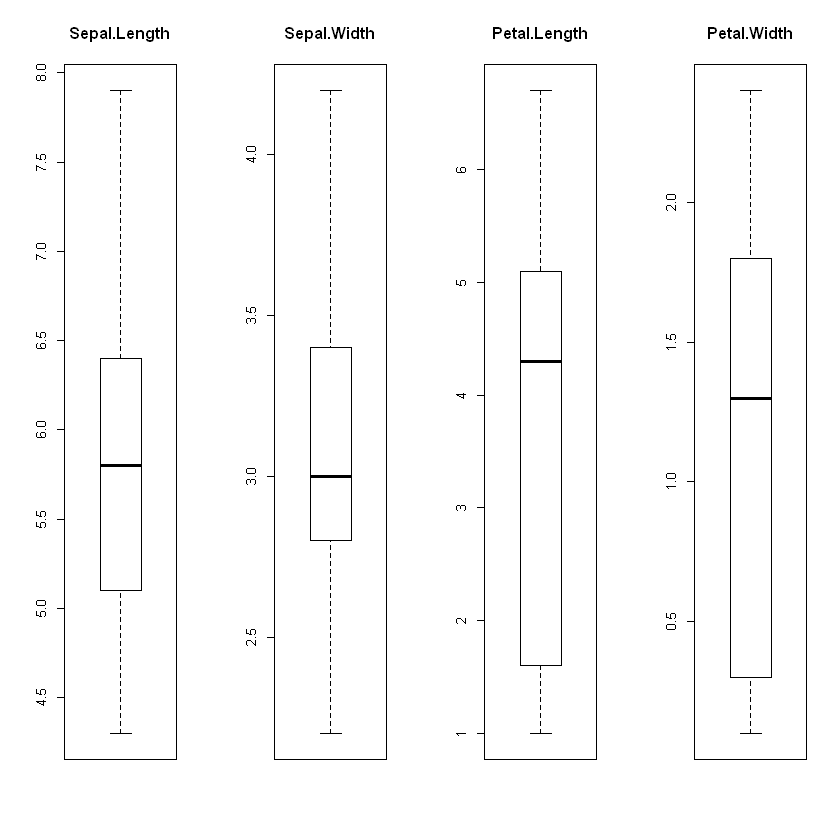

In [16]:
# boxplot for each attribute on one image
# par: Draw multiple figures on one image
# mfrow: figures arranged in 1x4 format
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}
# boxplot shows max, 25% percentile, median, 75% percentile, and min with oulier sometimes

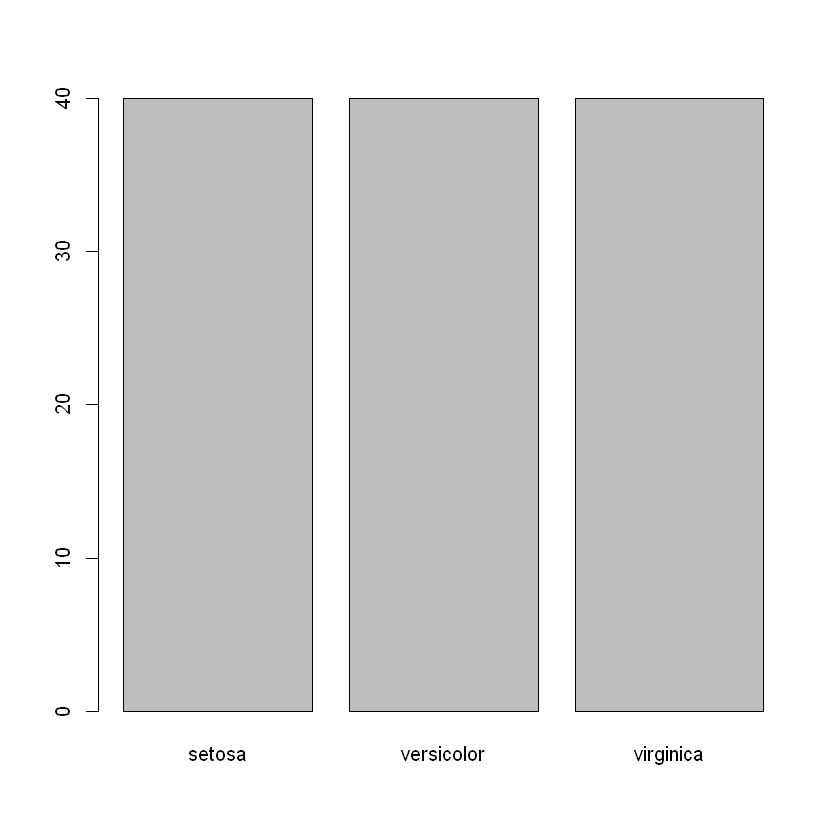

In [17]:
# barplot for class breakdown
plot(y)

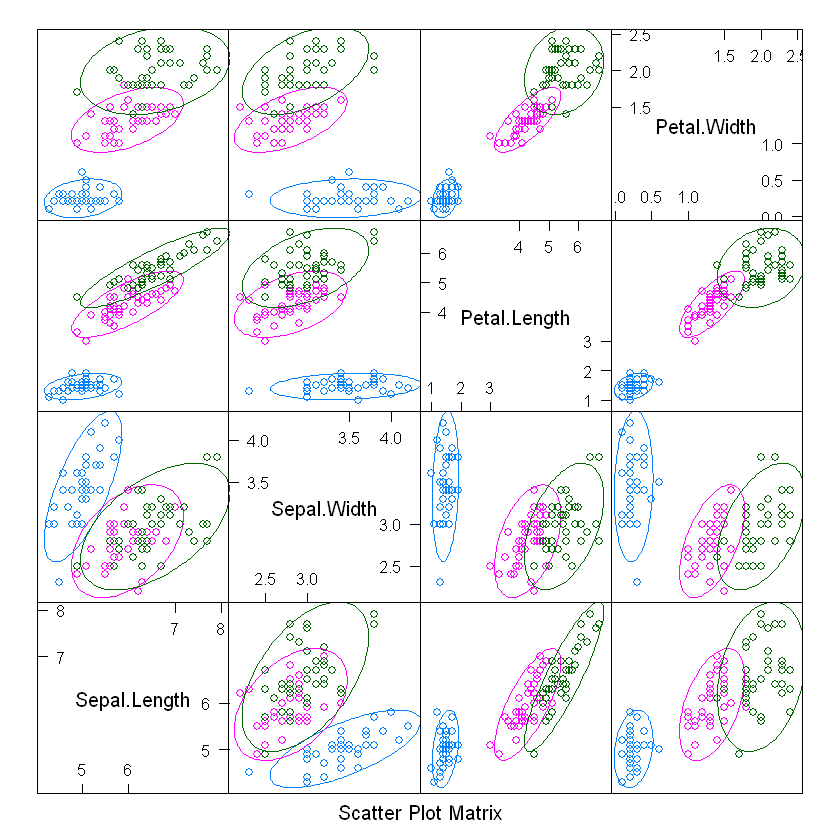

In [18]:
# scatterplot matrix
#install.packages('ellipse', repos='http://cran.us.r-project.org')
featurePlot(x=x, y=y, plot="ellipse")

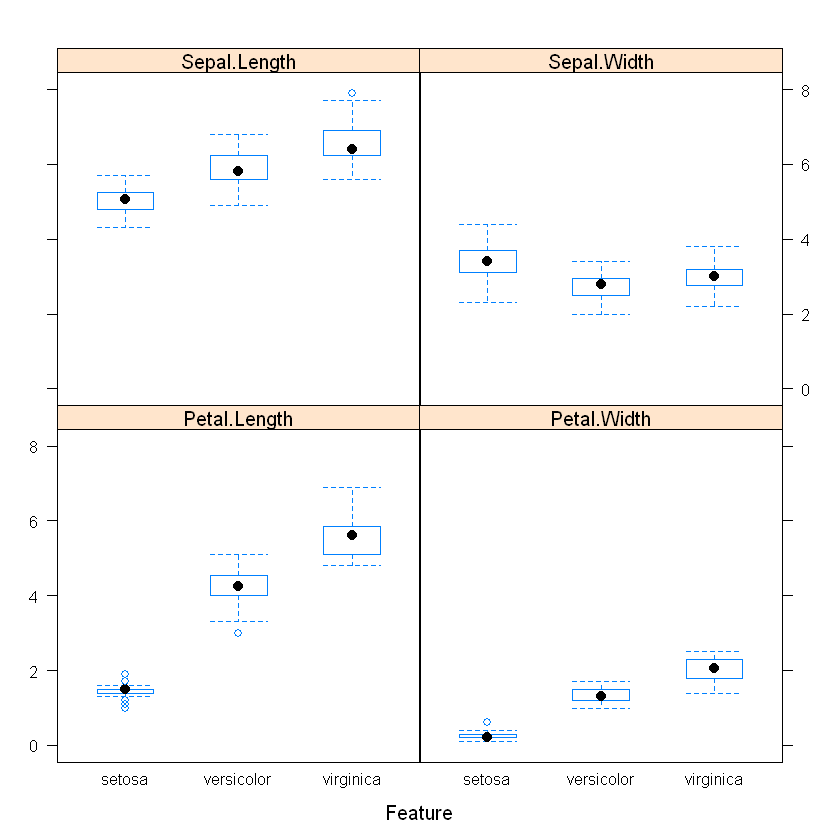

In [15]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

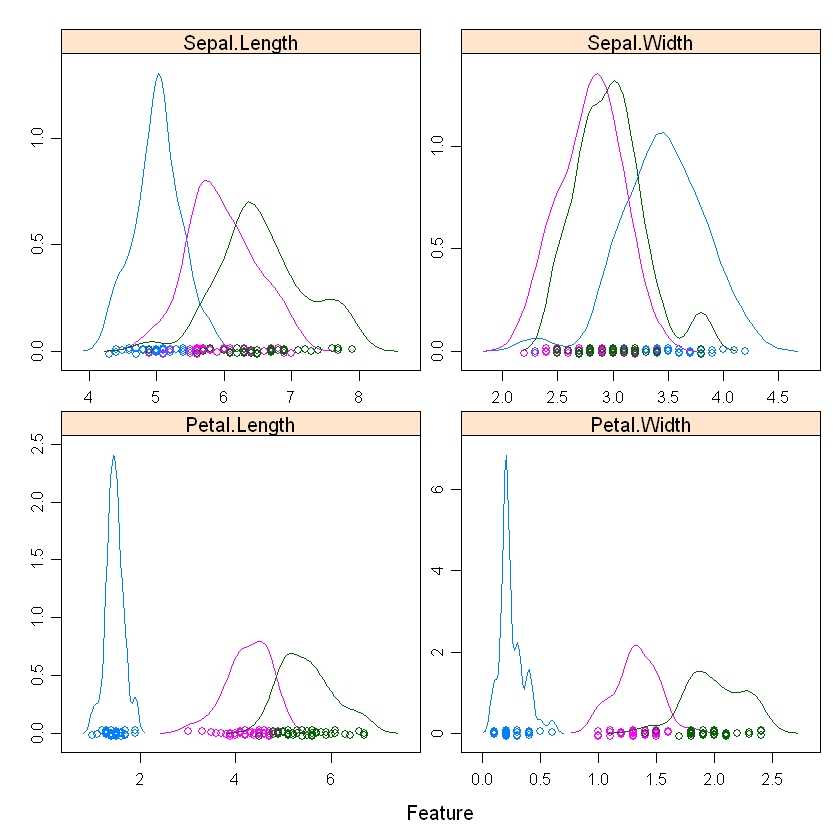

In [19]:
# density plots for each attribute by class value
# relation="free" : set scale free when displaying, i.e., not manual scaling
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [20]:
# Run algorithms using 10-fold cross validation
# package has method trainControl, 
# method : resampling method (cv, boot, etc.)
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [21]:
# rpart : Recursive PARTitioning
# kernlab : kernel based machine learning, contains  Support Vector Machines, 
# Spectral Clustering, Kernel PCA, Gaussian Processes and a QP solver.
# MASS : Modern Applied Statistics with S, contains LDA
# caret has KNN and rf
library(rpart)
library(kernlab)
library(MASS)

# Train with LDA(Linear Discriminant Analysis)
set.seed(7)
# set.seed is used for reproducing the results. 
# Without it, different results will be produced for each try
# Example
#sample(LETTERS, 5)
#sample(LETTERS, 5)
#set.seed(42);sample(LETTERS, 5)
#set.seed(42);sample(LETTERS, 5)

fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART(Recursive PARtitioning): inverse of hierarchical clustering
# Start with a single cluster and then split into clusters 
# that have the smallest within cluster distances in some metric
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN(k Nearest Neighbor)
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM(Support Vector Machine)
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# RF(Random Forest)
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)


Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [22]:
# summarize accuracy of models
# resamples does 10-fold cross validation. Training data is partitioned into
# 10 disjoint sets. Runs each algo 10 times with each of 10 sets being a 
# validation set while 9 remaining sets being a training set.
# summary shows statistics of Accuracy and Kappa.
# Kappa shows how much better the classification result is than random
# class assignment. 
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
       Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.9167  0.9375      1 0.9750       1    1    0
cart 0.8333  0.9375      1 0.9667       1    1    0
knn  0.8333  1.0000      1 0.9750       1    1    0
svm  0.8333  0.9167      1 0.9583       1    1    0
rf   0.8333  0.9167      1 0.9583       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875  0.9062      1 0.9625       1    1    0
cart 0.750  0.9062      1 0.9500       1    1    0
knn  0.750  1.0000      1 0.9625       1    1    0
svm  0.750  0.8750      1 0.9375       1    1    0
rf   0.750  0.8750      1 0.9375       1    1    0


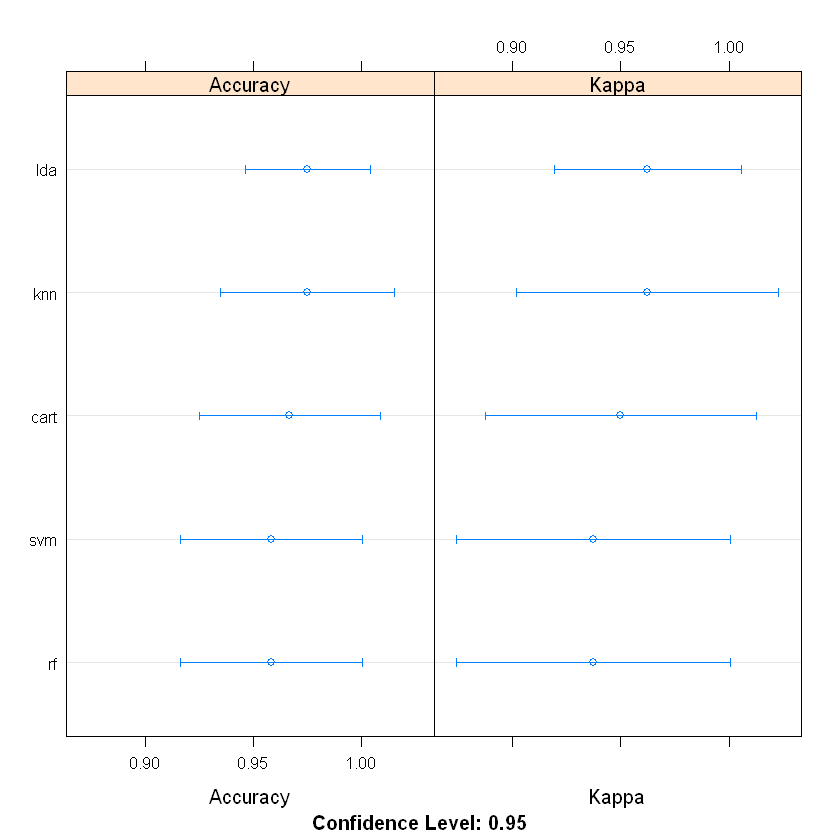

In [24]:
# compare accuracy of models
dotplot(results)

In [25]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy  Kappa 
  0.975     0.9625

 


In [27]:
# estimate skill of LDA on the validation dataset ==> 20% of original dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            0.3333           0.3333
Detection Rate